# Recommendation Systems for Amazon Electronic Products
# Table of Contents
1. Introduction
2. Importing Libraries
3. Loading Datasets
4. Exploratory Data Analysis
5. Recommender Systems
6. Conclusion



# Introduction
A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. Online E-commerce websites like Amazon, Filpkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real time.
This type of filtering matches each of the user's purchased and rated items to similar items, then combines those similar items into a recommendation list for the user. In this project we are going to build recommendation model for the electronics products of Amazon.

The main types of recommendations systems include:

# Popularity-Based Recommender
It offers generalized recommendations to every user, based on product popularity. This system recommends same products to all users and it does not give personalized recommendations to users.

# Content-Based Recommender
It builds an engine that computes similarity between products based on certain metrics such as description, and suggests products that are most similar to a particular product that a user liked. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

# Collaborative Recommender
This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filtering is based on the idea that users similar to a particular user can be used to predict how much that particular user will like a particular product or service those users have used/experienced but that particular user has not.

# Hybrid Recommender
This system builds an ensemble of Collaborative, Content-Based or Popularity-Based models to come up with a comprehensive Hybrid Recommendation System.


# For this project, we are using the Electronics dataset which includes:
userId : Every user identified with a unique id

productId : Every product identified with a unique id

Rating : Rating of the corresponding product by the corresponding user

timestamp : Time of the rating ( ignore this column for this project)

Our objective is to build a recommendation system to recommend products to customers based on the their previous ratings for other products. For this purpose, first we will perform exploratory data analysis and then implement recommendation algorithms including Popularity based Collaborative filtering using Singular value decomposition, Collaborative filtering using KNNWithmeans (user-user similarity),Collaborative filtering using KNNWithmeans (item-item similarity) and Hybrid recommender system

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
from os import path
if path.exists("ratings_Electronics.csv"):
    print ("Data Exists")
    Data=pd.read_csv('ratings_Electronics.csv',names=('userId','productId','ratings','timestamp'))
    print('Data Loaded')
    
else:
    os.system('curl http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Electronics.csv -o ratings_Electronics.csv')
    print('Done downloading')

Data Exists
Data Loaded


if the above code block does not work, get data from here
http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Electronics.csv

Data=pd.read_csv(r'C:\Users\vinod\Downloads\ratings_Electronics.csv',names=('userId','productId','ratings','timestamp'))

In [3]:
Data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
print("Number of rows: {} & Columns : {} in our Dataset".format(Data.shape[0],Data.shape[1]))

Number of rows: 7824482 & Columns : 4 in our Dataset


In [5]:
#dropping timestamp column as it is not used for our analysis
Data=Data.drop(['timestamp'],axis=1)

In [6]:
Data.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


After removing timestamp column, our dataset has three columns where two are of object type and rating being a neumeric(float).

In [8]:
dp=Data.duplicated().sum()
#Checking duplicates 
print("Number of Duplicates in our dataset :{}".format(dp))

Number of Duplicates in our dataset :0


Check for Null Values

In [9]:
Data.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [10]:
Data.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

As you could see there are no null values either in our dataset

In [11]:
uq=len(Data['userId'].unique())
pq=len(Data['productId'].unique())
print("The number of Unique Users:{} and number of unique products:{} in our ecommerce site".format(uq,pq))

The number of Unique Users:4201696 and number of unique products:476002 in our ecommerce site


In [12]:
print(Data.describe(exclude=[np.object]).T)
q1=Data['ratings'].quantile(.25)
q3=Data['ratings'].quantile(.50)
IQR=q3-q1
print("______________________________________________________________")
print("IQR for ratings in our data is :{}".format(IQR))

             count      mean      std  min  25%  50%  75%  max
ratings  7824482.0  4.012337  1.38091  1.0  3.0  5.0  5.0  5.0
______________________________________________________________
IQR for ratings in our data is :2.0


# Statistical Analysis:
Since userid and productid columns are objects, we shall do Statistical analysis of rating column alone.

Every user in the dataset has rated atleast one product.
The Minimum rating that a product has received in 1.0 and the max rating the product has received is 5.0.
The range of dispersion for rating is 1-5.
The average/mean rating by all users to our products is 4.01, with standard deviation 0f 1.3. Our data points are quite widely spread from the mean.

Our First Qaurtile 25% is 3 which means 25% of data points fall at or below it.

Our median second Qaurtile at 50% is 5.
Our Third quartile 75% is 5.

ratings
1.0     901765
2.0     456322
3.0     633073
4.0    1485781
5.0    4347541
Name: ratings, dtype: int64


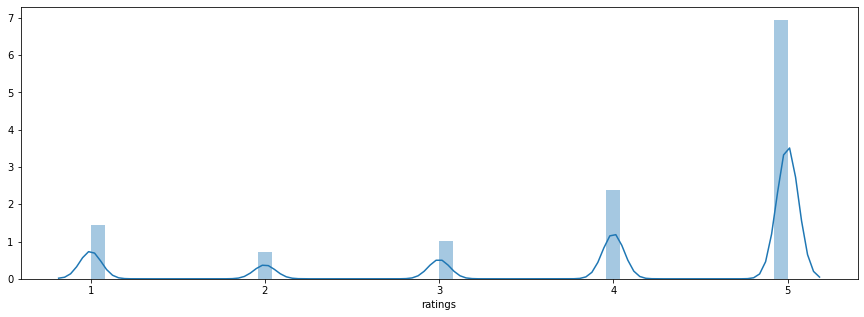

In [13]:
rt_gp=Data.groupby('ratings')['ratings'].count()
print(rt_gp)
plt.figure(figsize=(15,5))
sns.distplot(Data['ratings'],norm_hist=True);

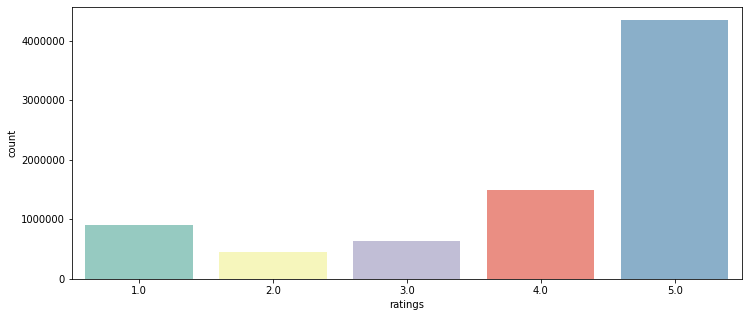

In [14]:
plt.figure(figsize=(12,5))
sns.countplot(Data['ratings'],palette="Set3")

From the histogram, we could see the five groups of ratings.
Looks like our users are more generous and have given the top rating 5 for good products.
Ratings 1,2,3 have a similiar trend among users, whereas rating 4 is slighly higher.



We study the distribuition of number of ratings and mean ratings recorded for each product.

In [15]:
df_rating=pd.DataFrame({'Number of Rating':Data.groupby('productId').count()['ratings'], 'Mean Rating':Data.groupby('productId').mean()['ratings']})

In [16]:
df_rating.head()

,Number of Rating,Mean Rating
productId,,
0132793040,1,5.000000
0321732944,1,5.000000
0439886341,3,1.666667
0511189877,6,4.500000
0528881469,27,2.851852


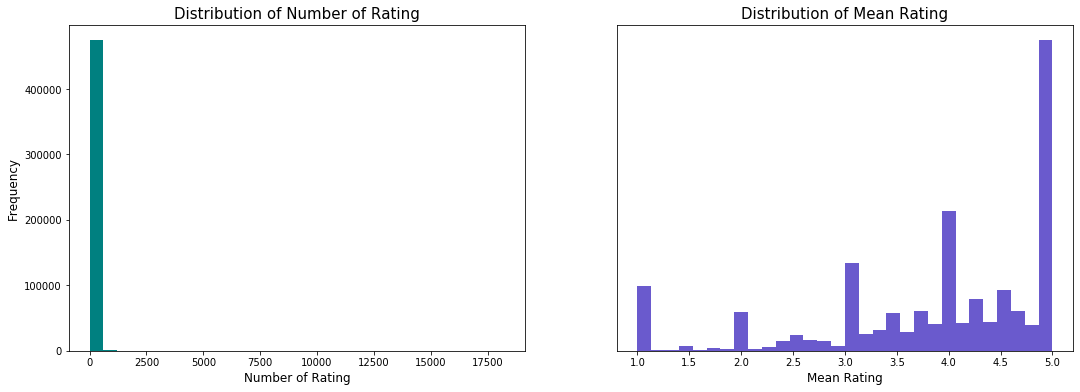

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=15)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

From these histograms we can see that most of the number of ratings are between 0 and 1825, and most of the products have a mean rating of 5.

We create a scatter plot to observe the relationship between Number of Rating and Mean Rating.

<Figure size 576x432 with 0 Axes>

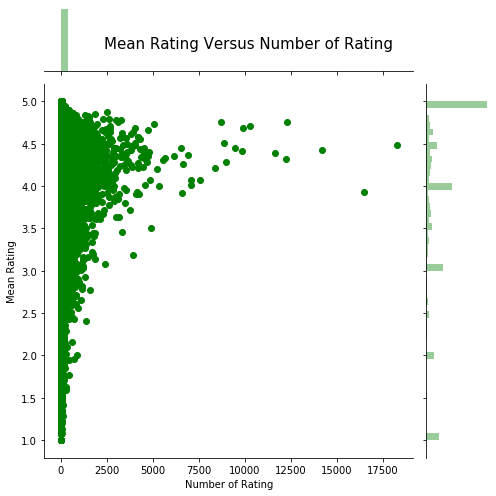

In [18]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Number of Rating', y='Mean Rating',data=df_rating,color='g', height=7)
plt.suptitle('Mean Rating Versus Number of Rating', fontsize=15, y=0.92)

plt.show()

##### Distribution Analysis:
User Group 1,2,3 is normally distributed with a smooth peak and are platykurtic , whereas for groups 4 & 5 the peaks are sharp and are leptokurtic.
Tip: kurtosis values are compared with that of the normal distribution as values less than 3 are said to be platykurtic, or "flat-topped." Alternatively, kurtosis values higher than 3 are said to be leptokurtic, usually appearing sharp at their peak value.

In [19]:
Data['ratings'].skew()

-1.2053971865633306

Ratings in our data is a negatively skewed with the tail being extended towards left from the median.

In [20]:
rt_gp_user=Data.groupby('userId')['ratings'].count()
rt_gp_product=Data.groupby('productId')['ratings'].count()
Most_occured_procuct=Data['productId'].value_counts().idxmax()
Most_freq_user=Data['userId'].value_counts().idxmax()

In [21]:
print("The Max number of ratings we have received for a single product is :{} & the product ID that has received is :{}".format(rt_gp_product.max(),Most_occured_procuct))
print("The User :{} has given max number of ratings across products with Number of ratings being:{}".format(Most_freq_user,rt_gp_user.max()))

The Max number of ratings we have received for a single product is :18244 & the product ID that has received is :B0074BW614
The User :A5JLAU2ARJ0BO has given max number of ratings across products with Number of ratings being:520


Take a subset of the dataset to make it less denser.
Identifying number of ratings provided by each user.
I am using pandas join and groupby to get the count of number of ratings given by each user.
The column ratings_user_count will give the number of ratings provided by the user.

In [22]:
df=Data.join(Data.groupby('userId')['ratings'].count(),on='userId',rsuffix='_user_count')

In [23]:
df.head()

,userId,productId,ratings,ratings_user_count
0,AKM1MP6P0OYPR,0132793040,5.0,2
1,A2CX7LUOHB2NDG,0321732944,5.0,4
2,A2NWSAGRHCP8N5,0439886341,1.0,1
3,A2WNBOD3WNDNKT,0439886341,3.0,1
4,A1GI0U4ZRJA8WN,0439886341,1.0,1


Now, Lets try to make a subset of data. Though we have a large dataset, lets consider ratings provided by user who have rated more than 50 products. The reason being:
We may not be able to understand or rely on a user rating with fewer number of representation from the user. For example, if a product has received only a single rating or a user has rated only one product it doesn't give us any variety.
Memory consideration, for techinques like SVD, collaborative filtering methods it becomes compuationally complex with the local machines on a high volume dataset.
I am creating a function subset , which will count the number of ratings provided by each user and will calssify a user as if he has rated more than 50 ratings or rated less than 50 ratings in a column called Group

In [24]:
def subset(row):
    if row['ratings_user_count']> 50:
        return "Rated more than 50"
    else:
        return "Rated Less than 50"
df['Group']=df.apply(subset,axis=1)

In [25]:
df.tail(10)

,userId,productId,ratings,ratings_user_count,Group
7824472,A5FUA9HEV2O42,BT008UKTMW,5.0,1,Rated Less than 50
7824473,A84WRQR47OOKR,BT008UKTMW,1.0,1,Rated Less than 50
7824474,A180UGKKYCPDH0,BT008UKTMW,5.0,1,Rated Less than 50
7824475,A2R6Q6KJCYSVH7,BT008UKTMW,3.0,5,Rated Less than 50
7824476,A2IGIIABRZ5LAB,BT008UKTMW,5.0,1,Rated Less than 50
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,2,Rated Less than 50
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,2,Rated Less than 50
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,19,Rated Less than 50
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1,Rated Less than 50
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,11,Rated Less than 50


In [26]:
user_more_than_50=df[df['Group']=='Rated more than 50']
user_less_than_50=df[df['Group']=='Rated Less than 50']
A=user_more_than_50['Group'].count()
B=user_less_than_50['Group'].count()
print("Number of users who have more than 50 ratings:{}".format(user_more_than_50['Group'].count()))
print("Number of users who have less than 50 ratings:{}".format(user_less_than_50['Group'].count()))

sub_per=(A/(A+B)) * 100
print("Our subset is just :{} % of our total data, However it gives us the data density required with total number of records:{}".format(sub_per,A))

Number of users who have more than 50 ratings:122171
Number of users who have less than 50 ratings:7702311
Our subset is just :1.5613940961203565 % of our total data, However it gives us the data density required with total number of records:122171


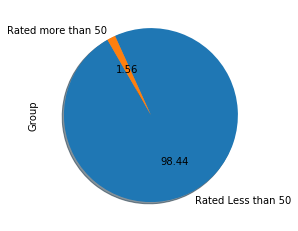

In [27]:
df['Group'].value_counts().plot.pie(shadow=True, startangle=120,autopct='%.2f')

Keep the users only who has given 50 or more number of ratings
Now, Let's extract the details of users and products who have given more than 50 ratings and store it is a seperate dataframe.

In [28]:
subset=df[df['Group']=='Rated more than 50']

In [29]:
subset.shape

(122171, 5)

Now the subset dataset contains 122171 rows of unique users who have given more than 50 ratings.

The below distplot shows the distribution of our subset.

If we compare the distribution of original data vs subset, we could see that the distributions are similar for user groups who have rated 5,4. whereas the distribution for ratings 1,2,3 have slightly changed and the peaks looks flat and smooth.

This is due to change in the data both in volume and values.

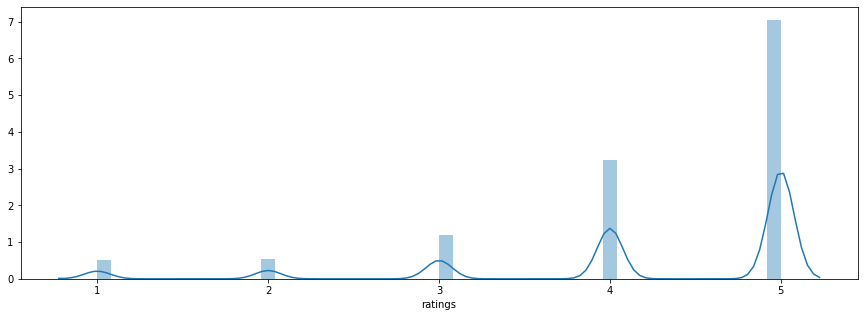

In [30]:
plt.figure(figsize=(15,5))
sns.distplot(subset['ratings']);

In [31]:
#exporting the subset to csv 
subset.to_csv('subset_morethan_50ratings.csv')

In [32]:
subset_with_number_of_ratings=subset.join(subset.groupby('productId')['ratings'].count(),on='productId',rsuffix='_product_count')

In [33]:
subset_with_number_of_ratings.head()

,userId,productId,ratings,ratings_user_count,Group,ratings_product_count
118,AT09WGFUM934H,0594481813,3.0,110,Rated more than 50,1
177,A32HSNCNPRUMTR,0970407998,1.0,72,Rated more than 50,2
178,A17HMM1M7T9PJ1,0970407998,4.0,151,Rated more than 50,2
492,A3CLWR1UUZT6TG,0972683275,5.0,58,Rated more than 50,3
631,A3TAS1AG6FMBQW,0972683275,5.0,163,Rated more than 50,3


Adding one more column "ratings_product_count" this will give the count of how many ratings the specific product ID has received.

In popularity based recommendation , we will use this detail to give more insights to the user about the product.

How to read the above dataframe?

"The product 0594481813 has a rating of 3.0 and has received only one rating by a user AT09WGFUM934H who has rated 110 other products in our subset".



# Popularity Recommender model
Having built the dataset with our required columns, we can now build our popularity based recommender system.

# What is popularity based recommender system?
It is the simplest recommendation model that works on principle of popularity that identifies the products that are popular among users. This will give the users recommendation of products that are in trend, high in demand and are bought by users.

In [34]:
#Lets drop the columns userId and group 
Popularity_based_Recommendadtion=subset_with_number_of_ratings.drop(['userId','Group'],axis=1)

Popularity based on user rating and number of ratings received by each product.

In [35]:
Popularity_based_Recommendadtion.shape

(122171, 4)

In [36]:
PRS_Product_rated_count=pd.DataFrame(Popularity_based_Recommendadtion.groupby('productId')['ratings','ratings_product_count'].mean().sort_values(by='ratings_product_count',ascending=False))

I have now created a dataframe that lists the products, its ratings and how many ratings the product has received and sorted based on number of ratings received.

In [37]:
#Top 10 products based on number of ratings the product has received 
PRS_Product_rated_count.head(10)

,ratings,ratings_product_count
productId,,
B0088CJT4U,4.215686,204
B003ES5ZUU,4.858757,177
B000N99BBC,4.773006,163
B007WTAJTO,4.692308,156
B00829TIEK,4.431507,146
B008DWCRQW,4.088889,135
B00829THK0,4.409091,132
B002R5AM7C,4.118110,127
B004CLYEDC,4.666667,117


Popularity based on user rating

In [38]:
PRS_by_Rating=pd.DataFrame(Popularity_based_Recommendadtion.groupby('productId')['ratings','ratings_product_count'].mean().sort_values(by='ratings',ascending=False))

I have now created a dataframe that lists the products, sorted based on rating and how many ratings the product has received and sorted based on user ratings

In [39]:
#Top 10 products based on top rating received by the product  
PRS_by_Rating.head(10)

,ratings,ratings_product_count
productId,,
B00LKG1MC8,5.0,1
B001UE6HZ2,5.0,1
B001UKJ8FC,5.0,1
B001UK6UO4,5.0,1
B0082N9DGY,5.0,1
B0082N9E9U,5.0,1
B001UJJNNA,5.0,1
B001UIPV28,5.0,1
B001UIHAOK,5.0,1


Both the above systems give the user top rated products. The table 2 though shows the products which have been rated the best but the number of ratings it has received is just 1.
However the table 1 gives more credibility as it recommends the products based on number of users who have rated the product and not just products that have just been rated high
Now, We will get the number of ratings for each scale between 1 to 5 for each product and make it as a dataframe

In [40]:
S=pd.DataFrame(subset.groupby('productId')['ratings'].value_counts().unstack().fillna(0))

In [41]:
S

ratings,1.0,2.0,3.0,4.0,5.0
productId,,,,,
0594481813,0.0,0.0,1.0,0.0,0.0
0970407998,1.0,0.0,0.0,1.0,0.0
0972683275,0.0,0.0,0.0,0.0,3.0
1400501466,2.0,0.0,1.0,0.0,2.0
1400501520,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
B00LED02VY,0.0,0.0,0.0,1.0,0.0
B00LGN7Y3G,0.0,0.0,0.0,0.0,1.0
B00LGQ6HL8,0.0,0.0,0.0,0.0,5.0


Rating count for each scale
Now lets further try to enhance the Table 1 with recommendations to users with how many ratings have been given by users for each product on a scale of 1 to 5 along with product rating & product rating count.

In [42]:
Popularity_Final=pd.merge(PRS_Product_rated_count,S,on='productId')

In [43]:
Popularity_Final.nlargest(15,'ratings_product_count')

,ratings,ratings_product_count,1.0,2.0,3.0,4.0,5.0
productId,,,,,,,
B0088CJT4U,4.215686,204,2.0,8.0,24.0,80.0,90.0
B003ES5ZUU,4.858757,177,0.0,2.0,2.0,15.0,158.0
B000N99BBC,4.773006,163,0.0,0.0,5.0,27.0,131.0
B007WTAJTO,4.692308,156,5.0,1.0,3.0,19.0,128.0
B00829TIEK,4.431507,146,4.0,3.0,4.0,50.0,85.0
B008DWCRQW,4.088889,135,4.0,5.0,18.0,56.0,52.0
B00829THK0,4.409091,132,3.0,5.0,5.0,41.0,78.0
B002R5AM7C,4.118110,127,1.0,3.0,23.0,53.0,47.0
B004CLYEDC,4.666667,117,0.0,0.0,3.0,33.0,81.0


TOP 5 Recommendations from each model
Popularity Based Recommendation

In [44]:
print("The top 5 products that we recommend using popularity based recommendation:")
print(Popularity_Final.nlargest(5,'ratings_product_count'))

The top 5 products that we recommend using popularity based recommendation:
             ratings  ratings_product_count  1.0  2.0   3.0   4.0    5.0
productId                                                               
B0088CJT4U  4.215686                    204  2.0  8.0  24.0  80.0   90.0
B003ES5ZUU  4.858757                    177  0.0  2.0   2.0  15.0  158.0
B000N99BBC  4.773006                    163  0.0  0.0   5.0  27.0  131.0
B007WTAJTO  4.692308                    156  5.0  1.0   3.0  19.0  128.0
B00829TIEK  4.431507                    146  4.0  3.0   4.0  50.0   85.0


# So, above is the popularity based recommendation that we have created and we are highlighting the top 5 products that are popular among users along with average rating, number of ratings the product has received and its splitup on number of rating for each scale between 1 to 5.
# Advantages of Popularity based recommendation:
1. Computationally easy, Less complex.
2. No user charecterstics is required , hence does not suffer from cold start problem.
3. Can be made available to the user from day 1 of starting business.
# Disadvantages:
1. There is no variety in the recommendadtion.
2. No personalization in the recommendation either. Irrespective of what the user might be interested the model recommends the same set of prodcut to every user.

# Collaborative Filtering model
This method of recommendadtion overcomes the shortfall of popularity based recommendation systems.
Collaborative filtering works on the similarity between different users or similarity between items.The similarity could be used to recommend the products based on user or item behaviour.

Couple of methods to implement Collaborative filtering :

1. Matrix Factorization using Singular value decomposition
2. Nearest Neighbour collaborative filtering (User based)
3. Nearest Neighbour collaborative filtering (Item based)

# Matrix Factorization using Singular value decomposition
Matrix Factorization is used to identify/predict what rating will a specific user give for a given product based on the previous ratings he has provided to other items.
How is this done ?
1. The user & item data is first made avaiable as a matrix. Product and user charecterstics is computed for each user and each item.
2. Dot product of these charectersics will give the predictions for each user for each item in the matrix.
3. Now since we have the actual and the predicted data the algorithm will further use gradient descent to find the minimal error to predict the closest possible rating for the user.
We will use singular value decomposition from Surprise Library to implement this in python.
The name surprise stands for "Simple Python RecommendatIon System Engine"

Lets import SVD , Dataset and reader from surprise to read the dataset in surprise format.

In [45]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader

In [46]:
subset

,userId,productId,ratings,ratings_user_count,Group
118,AT09WGFUM934H,0594481813,3.0,110,Rated more than 50
177,A32HSNCNPRUMTR,0970407998,1.0,72,Rated more than 50
178,A17HMM1M7T9PJ1,0970407998,4.0,151,Rated more than 50
492,A3CLWR1UUZT6TG,0972683275,5.0,58,Rated more than 50
631,A3TAS1AG6FMBQW,0972683275,5.0,163,Rated more than 50
...,...,...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0,197,Rated more than 50
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0,238,Rated more than 50
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0,257,Rated more than 50
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0,238,Rated more than 50


In [47]:
reader=Reader(rating_scale=(1.0, 5.0))

In [48]:
#This line will create the matrix from our pandas dataframe
data_for_mf=Dataset.load_from_df(subset[['userId','productId','ratings']],reader)

In [49]:
data_for_mf

Split the data randomly into a train and test dataset :
Note that I am using train_test_split from surprise package and not from sklearn , so there will be a slight change in syntax

In [50]:
from surprise.model_selection.split import train_test_split
X,Y=train_test_split(data_for_mf,test_size=0.3)

In [51]:
#Naming the model M1 and calling the SVD algorithm.
M1=SVD()

In [52]:
data = Dataset.load_from_df(df[['userId', 'productId', 'ratings']], reader)

In [53]:
#train our model M1 with the training data
M1.fit(X)

In [54]:
#Lets do the prediction for the test set
predictions=M1.test(Y)

In [55]:
predictions[:10]

[Prediction(uid='AGGAQLXPVGM5D', iid='B0017QA5PG', r_ui=4.0, est=4.570532171920656, details={'was_impossible': False}),
 Prediction(uid='AQ3IN3MRXQ5KH', iid='B00BF9I0JI', r_ui=3.0, est=3.943799646036195, details={'was_impossible': False}),
 Prediction(uid='A2X3L31KCXBHCL', iid='B009A6CZ30', r_ui=5.0, est=4.871505599629649, details={'was_impossible': False}),
 Prediction(uid='AUK79PXTAOJP9', iid='B00B9AAKJ6', r_ui=5.0, est=4.643522335182841, details={'was_impossible': False}),
 Prediction(uid='A2GMZZ6TDYOHY7', iid='B00006RVPW', r_ui=5.0, est=4.893645328509704, details={'was_impossible': False}),
 Prediction(uid='A2ME89MSWVG9NF', iid='B00452V1ZW', r_ui=4.0, est=3.9521778022055516, details={'was_impossible': False}),
 Prediction(uid='AMFXXAOVV4CPJ', iid='B002TQ6HT6', r_ui=4.0, est=4.660558207101866, details={'was_impossible': False}),
 Prediction(uid='ACYZXQ2JKPZKT', iid='B0097CXFCC', r_ui=3.0, est=3.519806878884454, details={'was_impossible': False}),
 Prediction(uid='A257X1MQJO82P2', ii

For each user (uid), for the product (iid) our model has given the actual rating(r_ui) and the predicted rating (est) the user will give for the product.

was_impossible= False denotes that the algorithm was able predict the user rating , If was_impossible = True then it means that the algorithm was not able to predict the rating.This may generally happen if the user does not has any rating provided to any of the product which is also known as the cold start problem.

Now using the below function we will map the procuct id's(iid and est rating) for each user and also will sort the first 5 products recommended for each user

In [56]:
from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [57]:
top_n = get_top_n(predictions,n=5)

In [58]:
top_new= {k: top_n[k] for k in list(top_n)[:6]}
top_new

{'AGGAQLXPVGM5D': [('B002VPE21A', 4.941473189678129),
  ('B001A4LVYY', 4.854830402428875),
  ('B0014S5FVQ', 4.816144992095948),
  ('B002I636XM', 4.804750922825722),
  ('B003Y74AWU', 4.763632209343819)],
 'AQ3IN3MRXQ5KH': [('B001O4EPHA', 4.31946457314914),
  ('B00006IRR8', 4.256919742201941),
  ('B0055QZ216', 4.249006641317637),
  ('B004GUT1QO', 4.227494260238634),
  ('B00001W0D4', 4.180125729779477)],
 'A2X3L31KCXBHCL': [('B000JMJWV2', 4.980705781242808),
  ('B009A6CZ30', 4.871505599629649),
  ('B00829THVO', 4.695862119042963),
  ('B00EOI2SYK', 4.500604137624863),
  ('B001QATRCA', 4.438611265948701)],
 'AUK79PXTAOJP9': [('B0055QYKQO', 4.98055504768756),
  ('B0002L5R78', 4.964085760104514),
  ('B0077CR5RK', 4.809759694058663),
  ('B00763WKZW', 4.743124172756238),
  ('B007I5JT4S', 4.726091539031309)],
 'A2GMZZ6TDYOHY7': [('B002V8C3W2', 5.0),
  ('B006QB1RPY', 5.0),
  ('B001TH7GUU', 5.0),
  ('B0002JFN10', 4.937995527498018),
  ('B00006RVPW', 4.893645328509704)],
 'A2ME89MSWVG9NF': [('B009Y

In [59]:
from surprise import accuracy

In [60]:
print("The Root Mean Square Error for the Matrix Factorization using SVD:{}".format(accuracy.rmse(predictions,verbose=False)))
print("The Mean Absolute Error for the Matrix Factorization using SVD:{}".format(accuracy.mae(predictions,verbose=False)))

The Root Mean Square Error for the Matrix Factorization using SVD:0.9820025707657147
The Mean Absolute Error for the Matrix Factorization using SVD:0.7249951977256861


# Hybrid Recommender

In this section, we try to build a hybrid recommender that combines corrwith() method which computes the Pearson correlation coefficients with collaborative filtering. This is how it works:

Input: User ID and Product ID

Output: Similar products sorted on the basis of expected ratings by a particular user.

First, we create a pivot table which contains userIds as rows and productIds as columns. However, if we use the whole dataframe(df) in the below code, there will be an error because the input data has more than 7 million rows.

The below code will give an error: matrix=pd.pivot_table(data=df, values='rating', index='userId',columns='productId')

To avoid processing difficulties, we filter data which only contains the customers who have given ratings more than 50 times and put them into a dataframe. Since we are providing the recommendation of the products to the customers, it is better to remove data based on the userId rather than productId.

In [61]:
df_users=Data.groupby('userId').filter(lambda x: x['ratings'].count()>=50)

In [62]:
df_users.head()

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [63]:
df_users.shape

(125871, 3)

Then we create a pivot table.

In [64]:
matrix=pd.pivot_table(data=df_users, values='ratings', index='userId',columns='productId')

In [65]:
matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finally we define a function that takes in productId and useId as input and outputs up to 5 most similar products. For this purpose, we use corrwith() method to compute pairwise correlation between columns of dataFrame and calculate Pearson correlation coefficients.

In [66]:
# Function that takes in productId and useId as input and outputs up to 5 most similar products.
def hybrid_recommendations(userId, productId):
    
    # Get the Id of the top five products that are correlated with the ProductId chosen by the user.
    top_five=matrix.corrwith(matrix[productId]).sort_values(ascending=False).head(5)
    
    # Predict the ratings the user might give to these top 5 most correlated products.
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='nan':
            est_rating.append(M1.predict(userId, iid=x, r_ui=None).est)
           
    return pd.DataFrame({'productId':list(top_five.index)[:len(est_rating)], 'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)

As an example, we use this hybrid function to recommend similar products and predict the scores that might be given by a specific user to these similar products. It should be noted that this function was defined bassed on df_users dataframe that only includes the users who have rated 50 times or more. Now, we check the performance of this hybrid recommender for some of the userIds included in df_users dataframe.

In [67]:
hybrid_recommendations('A2NYK9KWFMJV4Y', 'B00LI4ZZO8')

,productId,estimated_rating
0,B00D1QC50S,4.917361
1,B00LI4ZZO8,4.866942
2,B00FRBCSUW,4.789639
3,B00ETH7ERM,4.731171
4,B00KIMX4EY,4.611572


# Collaborative Filtering Using KNNwithMeans
KNNWith means is a nearest neighbour mapping method , that is used to recommend users the products based on the what your closest neighbour has bought/liked.

More often than not, we do see "People who liked this also liked this", "People who bought this also bought these" when we do online shopping or watch movies etc. These are classic examples of recommendation systems that work on the concept of nearest neighbour colloborative filtering.

How is this done ?

The similarity between user/item is calculated for each user either based on cosine similiarity or using pearson correlation coefficient. Depending on the values of these parameters the products are suggested to the user.

Nearest Neighbour recommendation is not just limited to users , it can also be applied to understand the similarity between items.

In [68]:
#From surprise library , we are importing KNNwithmeans to implement this
from surprise import KNNWithMeans

In [69]:
#Due to memory issue I am using just a small subset of data, 
#We tried with higher values but we ran out of memory allocation and 50000 seems to be working fine
subset2=subset.head(50000)

In [70]:
subset2.shape

(50000, 5)

In [71]:
#loading the dataset in surprise format from the pandas dataframe and split the data into test and train
data_for_collab=Dataset.load_from_df(subset2[['userId','productId','ratings']],reader)
trainset,testset=train_test_split(data_for_collab,test_size=.15)

We are using GridSearch from surprise to implement KNN for both user-user colloboration and item-item colloboration , we will also use both cosine and pearson similarity and find the best parameters.

In [72]:
parm_grid={'k':[50,60,70],'name':["cosine","pearson_baseline"],'user_based':[True,False]}

In [73]:
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import cross_validate
Grid_1=GridSearchCV(KNNWithMeans,parm_grid,measures=["rmse", "mae"],cv=3)

In [74]:
Grid_1.fit(data_for_collab)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [75]:
Grid_1.best_params['rmse']

{'k': 50, 'name': 'cosine', 'user_based': True}

In [76]:
Grid_1.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x28f48645ec8>,
 'mae': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x28f4afecfc8>}

In [77]:
Grid_1.best_score

{'rmse': 1.124496729984408, 'mae': 0.8225132023110172}

# KNNwithMeans
Now, since we have obtained the best parameters for the KNNwithmeans using Gridsearch, we shall train the model M2 with these parameters.

Though the best results are obtained through user-user similarity in gridsearch, we shall also perform KNN with item -item similarity.

# What is user-user similarity?
The recommendations are provided to a user based on how similar the given user is with his neighbour within a set of cluster. The similarity is calculated either through cosine distance or pearson correlation.

# What is item-item similarity?
The recommendations are provided to a user based on how similar the given item is with it's neighbours within a set of cluster. The similarity is calculated either through cosine distance or pearson correlation.

In [78]:
M2=KNNWithMeans(k=50,sim_options={'name': 'cosine', 'min_support': 5, 'user_based': True,'k':5},verbose= True,c=3)

In [79]:
#fitting our training data to our model
M2.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [80]:
pred2=M2.test(testset)

In [81]:
pred2[:5]

[Prediction(uid='AMFXXAOVV4CPJ', iid='B001FG0JB8', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3N8O68DOEQ2FE', iid='B001E1Y5O6', r_ui=2.0, est=4.764705882352941, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKBVYIIHWI04B', iid='B002MAPRYU', r_ui=5.0, est=4.470588235294118, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ALNE7Q71JFC0F', iid='B002UT42UI', r_ui=2.0, est=4.588235294117647, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2T689YVOAYGGD', iid='B002QEBMAK', r_ui=5.0, est=4.228571428571429, details={'actual_k': 0, 'was_impossible': False})]

In [82]:
print("The Root Mean Square Error for KNNwithMeans using user user similarity:{}".format(accuracy.rmse(pred2,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using user user similarity:{}".format(accuracy.mae(pred2,verbose=False)))

The Root Mean Square Error for KNNwithMeans using user user similarity:1.0748432415608005
The Mean Absolute Error for KNNwithMeans using user user similarity:0.8123208725237712


Lets do 5 fold cross validation for our best model M2 with user_based = True and see the RMSE and MAE

In [83]:
cross_validate(M2,data_for_mf , measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0392  1.0403  1.0319  1.0318  1.0356  1.0358  0.0035  
MAE (testset)     0.7737  0.7787  0.7727  0.7717  0.7709  0.7736  0.0028  
Fit time          0.30    0.29    0.29    0.31    0.30    0.30    0.01    
Test time         0.43    0.40    0.40    0.63    0.41    0.45    0.09    


{'test_rmse': array([1.03918049, 1.04027796, 1.03193705, 1.03176468, 1.03563735]),
 'test_mae': array([0.7737375 , 0.77871772, 0.77271722, 0.77172989, 0.77087757]),
 'fit_time': (0.29900336265563965,
  0.28999972343444824,
  0.28999876976013184,
  0.30700135231018066,
  0.29595136642456055),
 'test_time': (0.433046817779541,
  0.40002942085266113,
  0.4030025005340576,
  0.6260004043579102,
  0.4080076217651367)}

# KNNwithMeans Item-Item similarity
When we implement collaborative filtering with surprise package, the method that we will invoke remains the same and just the boolean value for User_based parameter decides if we are going to implement user-user similarity or item-item similarity.

User_based= False will perform item , item similarity User_based= True will perform user, user similarity

In [84]:
M3=KNNWithMeans(k=50,sim_options={'name': 'cosine', 'min_support': 5, 'user_based': False,'k':5},verbose= True,c=3)

In [85]:
M3

In [86]:
M3.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [87]:
pred3=M3.test(testset)

In [88]:
pred3[:5]

[Prediction(uid='AMFXXAOVV4CPJ', iid='B001FG0JB8', r_ui=5.0, est=1.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3N8O68DOEQ2FE', iid='B001E1Y5O6', r_ui=2.0, est=4.591836734693878, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='AKBVYIIHWI04B', iid='B002MAPRYU', r_ui=5.0, est=4.206896551724138, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ALNE7Q71JFC0F', iid='B002UT42UI', r_ui=2.0, est=3.8529411764705883, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2T689YVOAYGGD', iid='B002QEBMAK', r_ui=5.0, est=4.127659574468085, details={'actual_k': 0, 'was_impossible': False})]

In [89]:
print("The Root Mean Square Error for KNNwithMeans using item item similarity:{}".format(accuracy.rmse(pred3,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using item item similarity:{}".format(accuracy.mae(pred3,verbose=False)))

The Root Mean Square Error for KNNwithMeans using item item similarity:1.1986272048648752
The Mean Absolute Error for KNNwithMeans using item item similarity:0.8539529393160146


# KNNWithMeans user - user similarity

In [90]:
def get_top_user(pred2,n=5):
  top_n=defaultdict(list)
  for uid,iid,true_r,est,_ in pred2:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1],reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
Top_CF_user=get_top_user(pred2,n=5)

# For each user Print the recommended items
for uid, user_ratings in list(Top_CF_user.items())[:5]:
        print(uid, [iid for (iid, _) in user_ratings])

AMFXXAOVV4CPJ ['B001FG0JB8', 'B000JVBU9K', 'B002OFA8AG', 'B001HN6CVA', 'B00180MMZC']
A3N8O68DOEQ2FE ['B001E1Y5O6', 'B0012Z3MKW', 'B001KEBR0C', 'B001O9X9EU', 'B000Z80ICM']
AKBVYIIHWI04B ['B002MAPRYU', 'B002A6G3V2', 'B000CKVOOY']
ALNE7Q71JFC0F ['B002UT42UI', 'B00022KOWU', 'B00009R9BP']
A2T689YVOAYGGD ['B0007XD33Q', 'B0002J1I2S', 'B002QEBMAK', 'B0000BZL1P', 'B001GCU0MY']


# KNNWithMeans item-item similarity

In [91]:
def get_top_item(pred3,n=5):
  top_n=defaultdict(list)
  for uid,iid,true_r,est,_ in pred3:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1],reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
Top_CF_item=get_top_item(pred3)

# For each user Print the recommended items
df_item=pd.DataFrame()
for uid, user_ratings in list(Top_CF_user.items())[:5]:
        print(uid, [iid for (iid, _) in user_ratings])


AMFXXAOVV4CPJ ['B001FG0JB8', 'B000JVBU9K', 'B002OFA8AG', 'B001HN6CVA', 'B00180MMZC']
A3N8O68DOEQ2FE ['B001E1Y5O6', 'B0012Z3MKW', 'B001KEBR0C', 'B001O9X9EU', 'B000Z80ICM']
AKBVYIIHWI04B ['B002MAPRYU', 'B002A6G3V2', 'B000CKVOOY']
ALNE7Q71JFC0F ['B002UT42UI', 'B00022KOWU', 'B00009R9BP']
A2T689YVOAYGGD ['B0007XD33Q', 'B0002J1I2S', 'B002QEBMAK', 'B0000BZL1P', 'B001GCU0MY']


User-User VS Item-Item similarity
Though user based and item based looks similar in implementation the results & how they work is entirely different.

Below I am highlighting the predictions of our model M2 (user based) & M3 (Item based)

Product recommendation Prediction of user-user similarity for user A2NU9H8H5MJZSL

A2NU9H8H5MJZSL ['B00005T3BG', 'B0000DK69P', 'B00016WQTQ', 'B0000ALPBJ', 'B002LMCQ8O']

Product recommendation Prediction of item-item similarity for user A2NU9H8H5MJZSL

A2NU9H8H5MJZSL ['B00005T3BG', 'B0000DK69P', 'B00016WQTQ', 'B0000ALPBJ', 'B002LMCQ8O']

As you could see, the list of products are entirely differnt.

In [92]:
print("The Root Mean Square Error for the Matrix Factorization using SVD:{}".format(accuracy.rmse(predictions,verbose=False)))
print("The Mean Absolute Error for the Matrix Factorization using SVD:{}".format(accuracy.mae(predictions,verbose=False)))
print("The Root Mean Square Error for KNNwithMeans using user user similarity:{}".format(accuracy.rmse(pred2,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using user user similarity:{}".format(accuracy.mae(pred2,verbose=False)))
print("The Root Mean Square Error for KNNwithMeans using item item similarity:{}".format(accuracy.rmse(pred3,verbose=False)))
print("The Mean Absolute Error for KNNwithMeans using item item similarity:{}".format(accuracy.mae(pred3,verbose=False)))

The Root Mean Square Error for the Matrix Factorization using SVD:0.9820025707657147
The Mean Absolute Error for the Matrix Factorization using SVD:0.7249951977256861
The Root Mean Square Error for KNNwithMeans using user user similarity:1.0748432415608005
The Mean Absolute Error for KNNwithMeans using user user similarity:0.8123208725237712
The Root Mean Square Error for KNNwithMeans using item item similarity:1.1986272048648752
The Mean Absolute Error for KNNwithMeans using item item similarity:0.8539529393160146


# Summary

# Recommendation Systems built:
1. Popularity based
2. Collaborative filtering using Singular value decomposition
3. Collaborative filtering using KNNWithmeans (user-user similarity)
4. Collaborative filtering using KNNWithmeans (item-item similarity)
5. Hybrid Recommendation System

Popularity based system was useful in providing the users with products those have received good ratings and were on high demand. However, there was no variety and personalization to the user.

Whereas, collaborative filtering with KNNwithmeans was good in providing the recommendations with personalization by selecting products those were purchased by similar users or products that were similar to other products the user has bought/liked.

With SVD we were able to predict what rating a user will provide if a product is recommended to a user depending on other ratings he had provided, And recommendation can be done by setting a threshold value and recommend products that have high rating.

On compairing all the recommendations we have built, each has its own advantages and disadvantages.


# To conclude, for this problem statement we suggest to go with Matrix Factorization using SVD as the RMSE and MAE for this system is least in error compared to others.


# References:
1. https://towardsdatascience.com/web-scraping-recommender-systems-project-1d360fa678e4
2. https://towardsdatascience.com/how-to-build-a-model-based-recommendation-system-using-python-surprise-2df3b77ab3e5
3. https://towardsdatascience.com/deep-learning-based-recommender-systems-3d120201db7e
4. https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf
5. https://medium.com/@madasamy/introduction-to-recommendation-systems-and-how-to-design-recommendation-system-that-resembling-the-9ac167e30e95
6. https://towardsdatascience.com/product-recommender-using-amazon-review-dataset-e69d479d81dd
